In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
boston = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Boston_house.csv")
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [8]:
# 데이터 로드
X = boston.drop(['Target'], axis=1)
y = boston['Target']

In [11]:
# 데이터 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X

array([[-0.12001342,  0.44105193,  0.41367189, ...,  0.28482986,
        -0.66660821, -0.27259857],
       [ 0.36716642,  0.44105193,  0.19427445, ..., -0.48772236,
        -0.98732948, -0.27259857],
       [-0.26581176,  0.39642699,  1.28271368, ..., -0.48772236,
        -0.98732948, -0.27259857],
       ...,
       [ 0.79744934,  0.44105193,  0.98496002, ..., -0.48772236,
        -0.80321172, -0.27259857],
       [ 0.73699637,  0.4032249 ,  0.72567214, ..., -0.48772236,
        -0.80321172, -0.27259857],
       [ 0.43473151,  0.44105193, -0.36276709, ..., -0.48772236,
        -0.80321172, -0.27259857]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
def build_model():
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))
  return model

In [50]:
model = build_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1792      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [85]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
26/26 [==============================] - 0s 6ms/step - loss: 0.4057 - mae: 0.4465 - val_loss: 11.8002 - val_mae: 2.2633
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3584 - mae: 0.4328 - val_loss: 11.4918 - val_mae: 2.2562
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4001 - mae: 0.4594 - val_loss: 11.5201 - val_mae: 2.2807
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4832 - mae: 0.4737 - val_loss: 11.8994 - val_mae: 2.3176
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3176 - mae: 0.3684 - val_loss: 11.6536 - val_mae: 2.2619
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3712 - mae: 0.3920 - val_loss: 12.4276 - val_mae: 2.3640
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4860 - mae: 0.4717 - val_loss: 12.1740 - val_mae: 2.3460
Epoch 8/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5

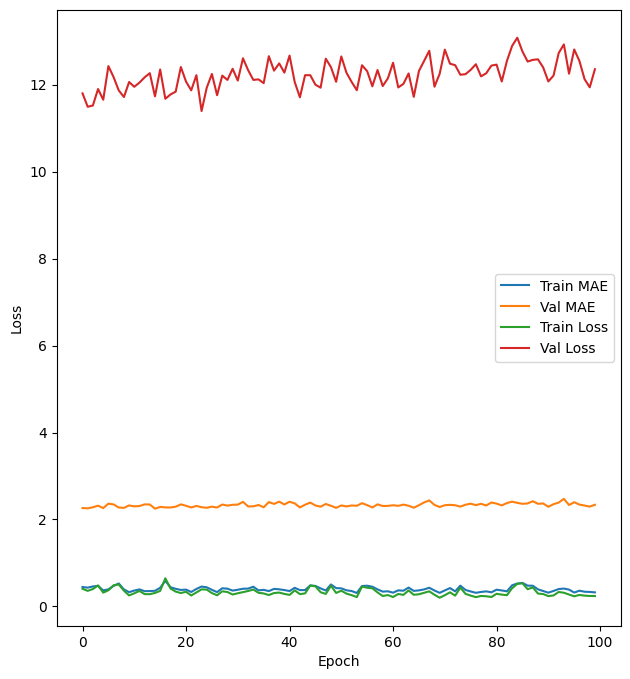

In [86]:
# 학습곡선 그리기

import matplotlib.pyplot as plt

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure(figsize=(16,8))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('MAE')
  plt.plot(hist['epoch'],hist['mae'],label='Train MAE')
  plt.plot(hist['epoch'], hist['val_mae'],label='Val MAE')
  plt.legend()

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'],hist['loss'],label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label='Val Loss')
  plt.legend()


  plt.show()

plot_history(history)